In [4]:
#importing libraries,packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Load the CSV file
df = pd.read_csv('employees.csv')

# Display the first 5 rows
print("Dataset Preview:")
print(df.head())

# Basic information
print("\nDataset Info:")
print(df.info())


Dataset Preview:
  First_Name  Gender  Start_Date Last_Login Time  Salary  Bonus_%  \
0    Douglas    Male  08-06-1993        12:42 PM   97308    6.945   
1     Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2      Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3      Jerry    Male  03-04-2005         1:00 PM  138705    9.340   
4      Larry    Male   1/24/1998         4:47 PM  101004    1.389   

  Senior_Management             Team  
0              True        Marketing  
1              True              NaN  
2             False          Finance  
3              True          Finance  
4              True  Client Services  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First_Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start_Date       

In [6]:
# Drop rows with missing values (optional, depending on your data quality)
df.dropna(inplace=True)

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("\nEncoded Data Sample:")
print(df.head())



Encoded Data Sample:
   First_Name  Gender  Start_Date  Last_Login Time  Salary  Bonus_%  \
0          54       1         178              133   97308    6.945   
2         129       0         539               69  130590   11.858   
3          89       1          57              148  138705    9.340   
4         118       1         238              340  101004    1.389   
5          47       1         533              180  115163   10.125   

   Senior_Management  Team  
0                  1     7  
2                  0     4  
3                  1     4  
4                  1     1  
5                  0     6  


In [7]:
# Select features and target (assuming 'Salary' is your target variable)
X = df.drop('Salary', axis=1)
y = df['Salary']


In [8]:
X

,First_Name,Gender,Start_Date,Last_Login Time,Bonus_%,Senior_Management,Team
0,54,1,178,133,6.945,1,7
2,129,0,539,69,11.858,0,4
3,89,1,57,148,9.340,1,4
4,118,1,238,340,1.389,1,1
5,47,1,533,180,10.125,0,6
...,...,...,...,...,...,...,...
994,67,1,606,387,4.479,1,7
996,152,1,257,429,19.675,0,4
997,167,1,566,129,1.421,0,8
998,118,1,537,339,11.985,0,0


In [9]:
y

0       97308
2      130590
3      138705
4      101004
5      115163
        ...  
994     98874
996     42392
997     96914
998     60500
999    129949
Name: Salary, Length: 764, dtype: int64

In [10]:
# Split the dataset into training and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [13]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1131054485.69
R² Score: -0.01


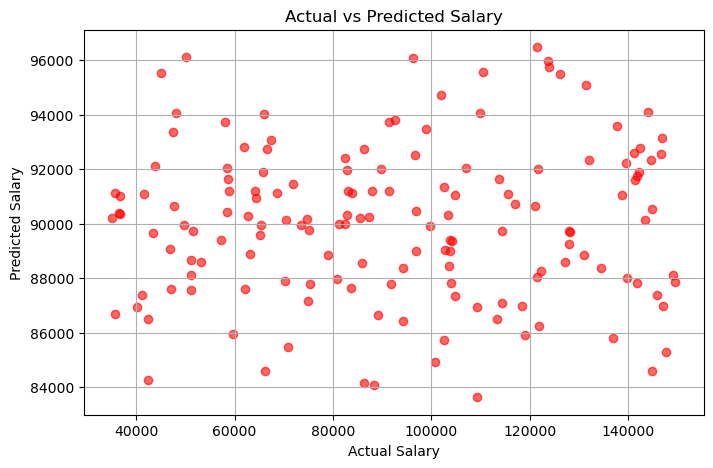

In [15]:
# Plot actual vs predicted salaries
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()
